# Wissensbasierte Systeme 
## ML-Übung #2 SOM

**Dozenten:** Dr. Sina Keller, M.sc. Felix Riese

**Datum:** 29.11.2017

**Datensatz:** EnMAP-Contest, [Download der Daten](http://www2.ipf.kit.edu/Projekte/code/EnMAP_Contest.zip) mit [Beschreibung](https://www.ipf.kit.edu/downloads/Instructions_EnMAP_Contest.pdf)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import h5py
import matplotlib.pyplot as plt

### Einlesen des Datensatzes
Der Datensatz `EnMAP_Contest_Data.mat` wurde heruntergeladen in das Verzeichnis dieses Notebooks.

In [3]:
datadict = {}
with h5py.File("./EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

print(datadict.keys())

dict_keys(['Im', 'cm', 'lx', 'ly', 'xi', 'yi'])


### Meine Self Organizing Map (SOM)

In [4]:
from selforganizingmap import SOM

#### sklearn-load_iris-Datensatz

(150, 4)
(150,)
Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:


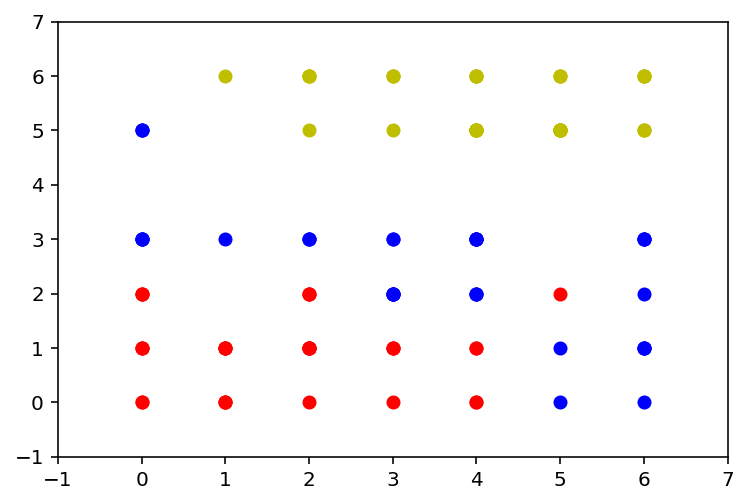

In [9]:
import sklearn.datasets
(X, y) = sklearn.datasets.load_iris(return_X_y=True)

print(X.shape)
print(y.ravel().shape)

n_rows = 7
n_cols = 7

my_som = SOM(n_rows=n_rows, n_cols=n_cols, iterations_max=5000, alpha_0=0.9, sigma_0=1)

# Entnehmen der Trainingsdatensätze
idx = np.random.randint(150, size=110)
my_som.fit(X[idx,:])

for index in idx:
#     print(dataset.shape)
    dataset = X[index]
    coords = my_som.classify(dataset)
    dataset_class = int(y[index])
    if dataset_class > -1:
#         print(dataset_class, end="")
#         print(coords)
        cm = ['y', 'b', 'r']
        plt.plot(coords[0], coords[1], color=cm[dataset_class], marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:")

Hier sieht man, wo die SOM Datensätze mit dem Label 2 einsortiert:


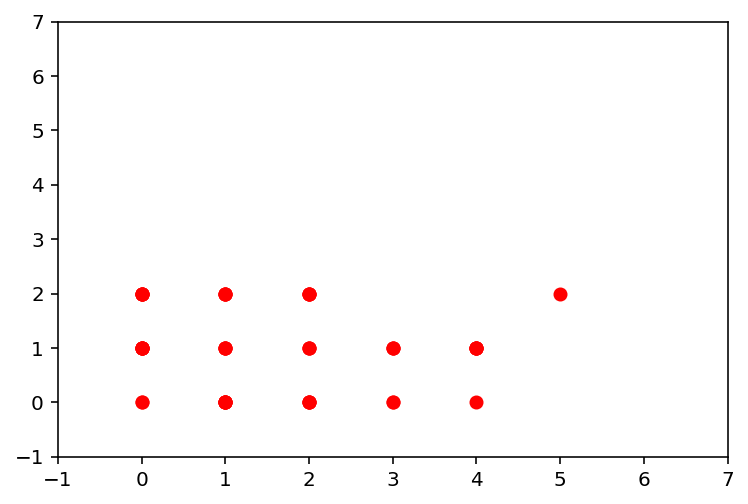

In [15]:
for index, dataset in enumerate(X):
#     print(dataset.shape)
    coords = my_som.classify(dataset)
    dataset_class = int(y[index])
    if dataset_class == 2:
#         print(coords)
        cm = ['y', 'b', 'r']
        plt.plot(coords[0], coords[1], color=cm[dataset_class], marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wo die SOM Datensätze mit dem Label 2 einsortiert:")

#### EnMAP-Contest-Datensatz

(2617, 244)
(2617,)
Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:


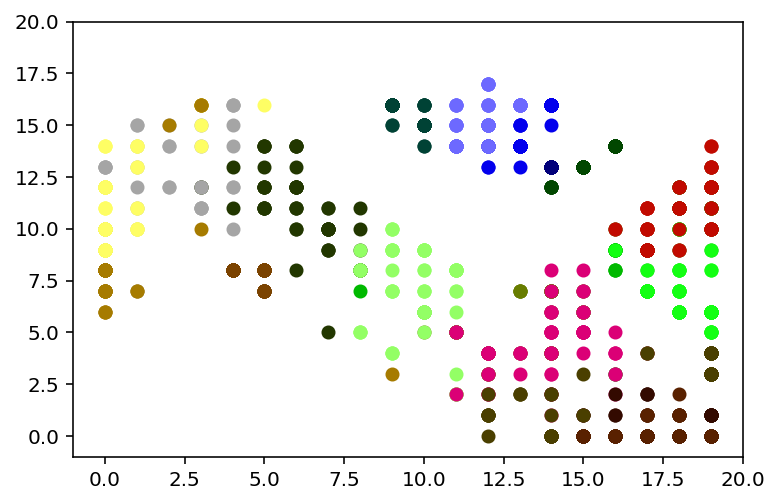

In [18]:
print(datadict["xi"].T.shape)
print(datadict["lx"].T.ravel().shape)

n_rows = 20
n_cols = 20

my_som = SOM(n_rows=n_rows, n_cols=n_cols, iterations_max=1000, alpha_0=0.9, sigma_0=1)
my_som.fit(datadict["xi"].T)

for index, dataset in enumerate(datadict["yi"].T):
#     print(dataset.shape)
    coords = my_som.classify(dataset)
    dataset_class = int(datadict["ly"].T[index])
    if dataset_class :
#         print(coords)
        dataset_class_color = tuple(datadict["cm"].T[dataset_class])
        plt.plot(coords[0], coords[1], color=dataset_class_color, marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:")

Hier sieht man, wo die SOM Evaluationsdatensätze einsortiert:


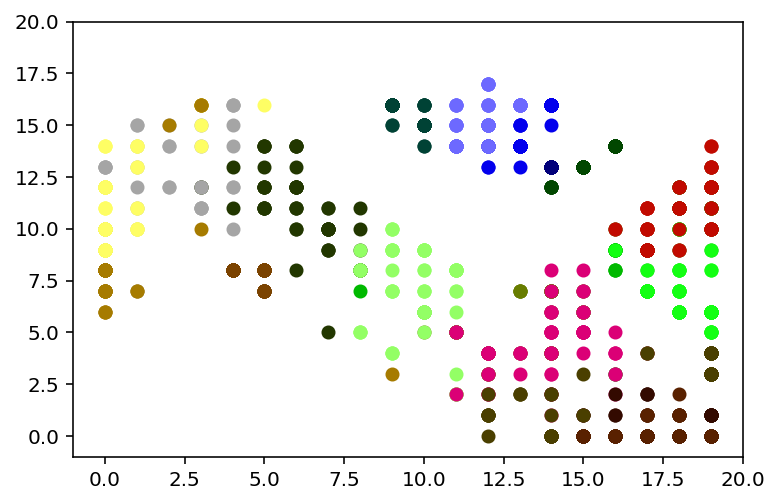

In [19]:
for index, dataset in enumerate(datadict["yi"].T):
#     print(dataset.shape)
    coords = my_som.classify(dataset)
    dataset_class = int(datadict["ly"].T[index])
    if dataset_class :
#         print(coords)
        dataset_class_color = tuple(datadict["cm"].T[dataset_class])
        plt.plot(coords[0], coords[1], color=dataset_class_color, marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wo die SOM Evaluationsdatensätze einsortiert:")